In [7]:
import cv2, os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

An image is just a matrix, with height and width.

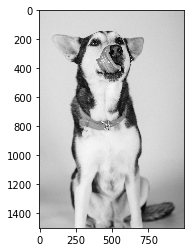

[[210 211 212 ... 187 188 187]
 [211 211 210 ... 188 185 186]
 [214 212 213 ... 186 189 186]
 ...
 [189 190 189 ... 145 146 150]
 [190 189 186 ... 149 149 149]
 [190 188 188 ... 150 150 148]]


In [111]:
inp_dir = './pics'
file = 'nooka.jpg'
sp = 'sp.jpg'
sp_bound = 'sp_bound.jpg'
src = cv2.imread(os.path.join(inp_dir,file), 0)
src_sp = cv2.imread(os.path.join(inp_dir,sp), 0)
src_sp_bound = cv2.imread(os.path.join(inp_dir,sp_bound), 0)

plt.imshow(src, cmap='gray')
plt.show()
print(src)

### Edge detection

In [80]:
def convolve(filter_dict, src_img):
    plt.figure(figsize=(50, 40))
    img = np.float32(src_img)
    col_ind = 2
    plt.subplot(1, len(filter_dict)+1, 1), 
    plt.imshow(img, cmap = 'gray')
    plt.axis('off')
    plt.title('original image', fontsize = 34)
    for kernel_name, kernel in filter_dict.items():
        output = cv2.filter2D(img, -1, kernel)
        plt.subplot(1, len(filter_dict)+1, col_ind)
        plt.imshow(output, cmap = 'gray')
        plt.title(kernel_name, fontsize = 34)
        plt.axis('off')
        col_ind +=1  
    plt.show()


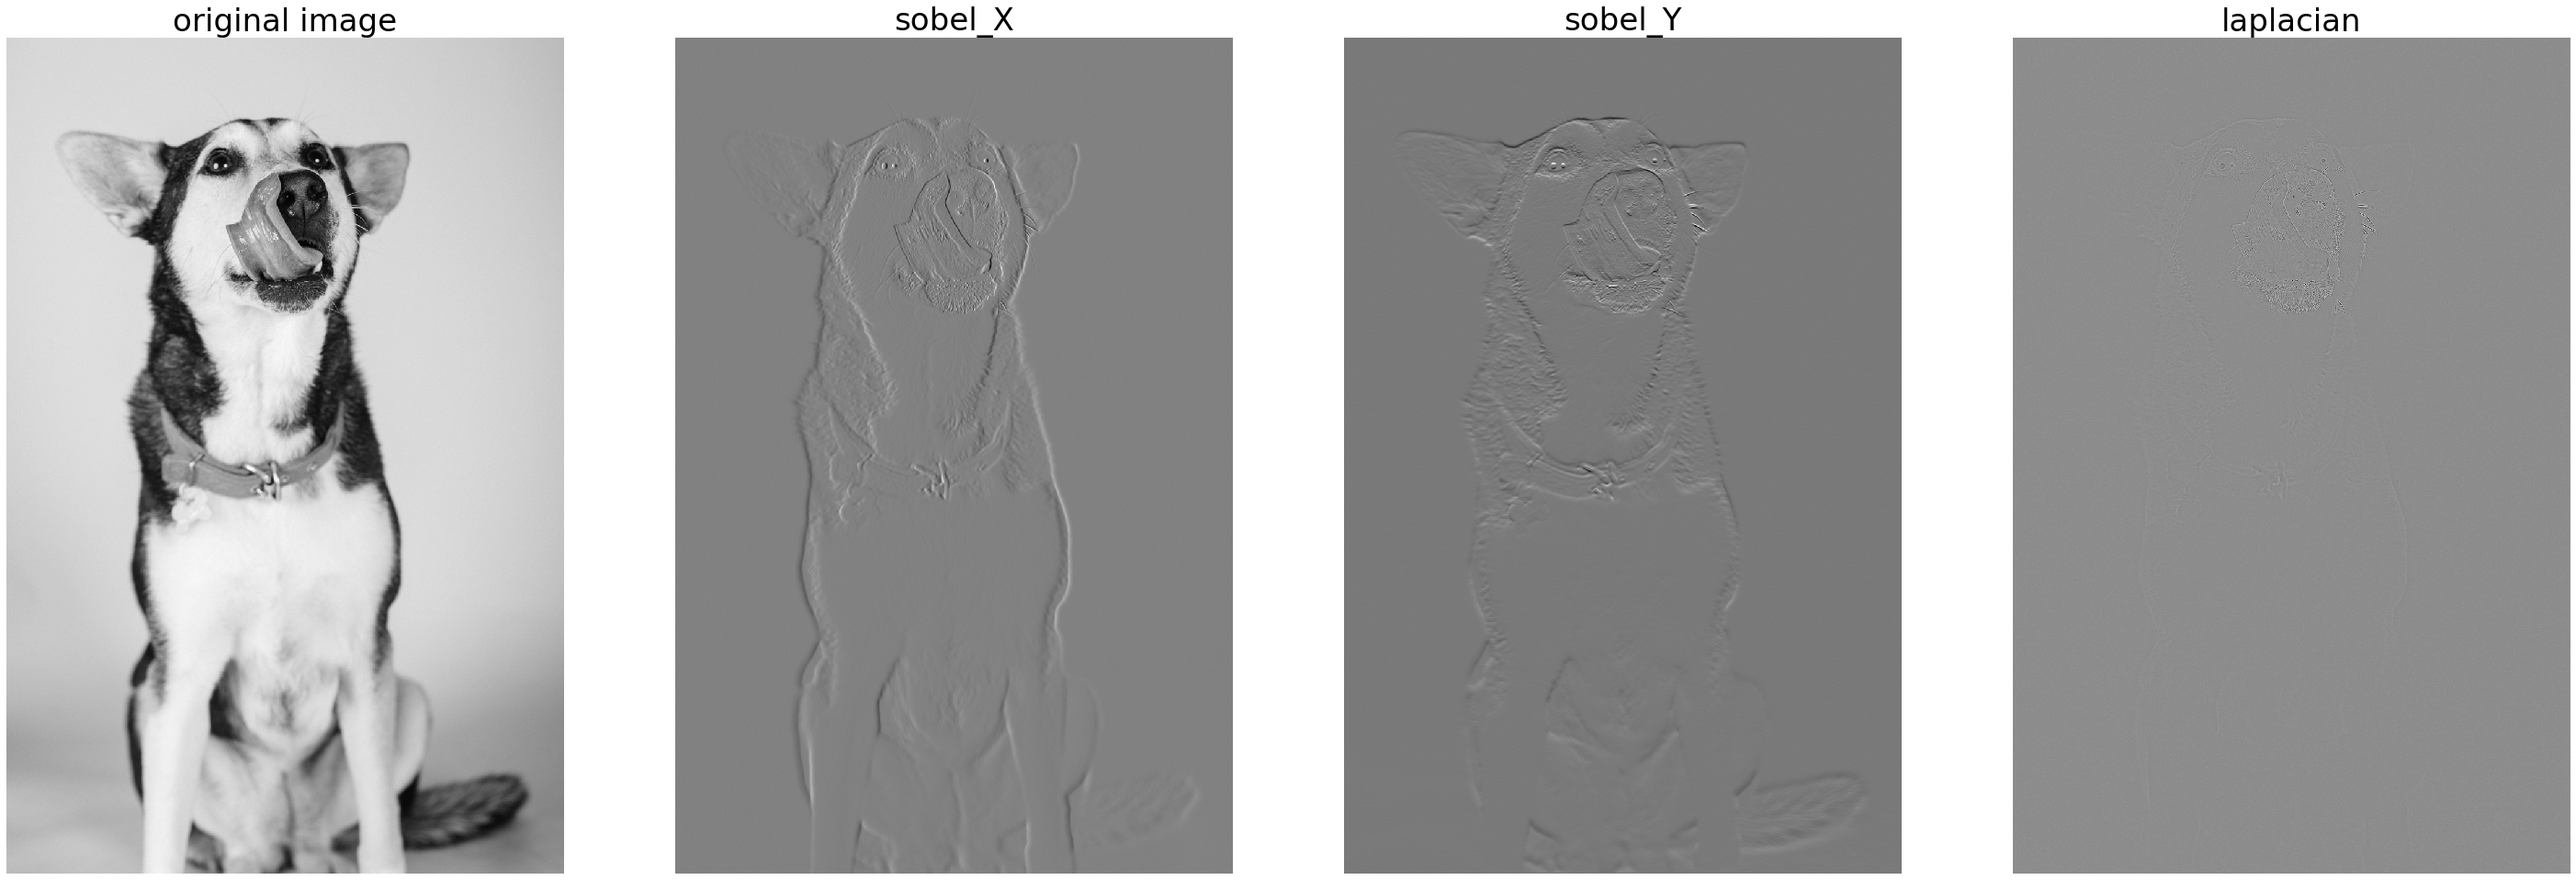

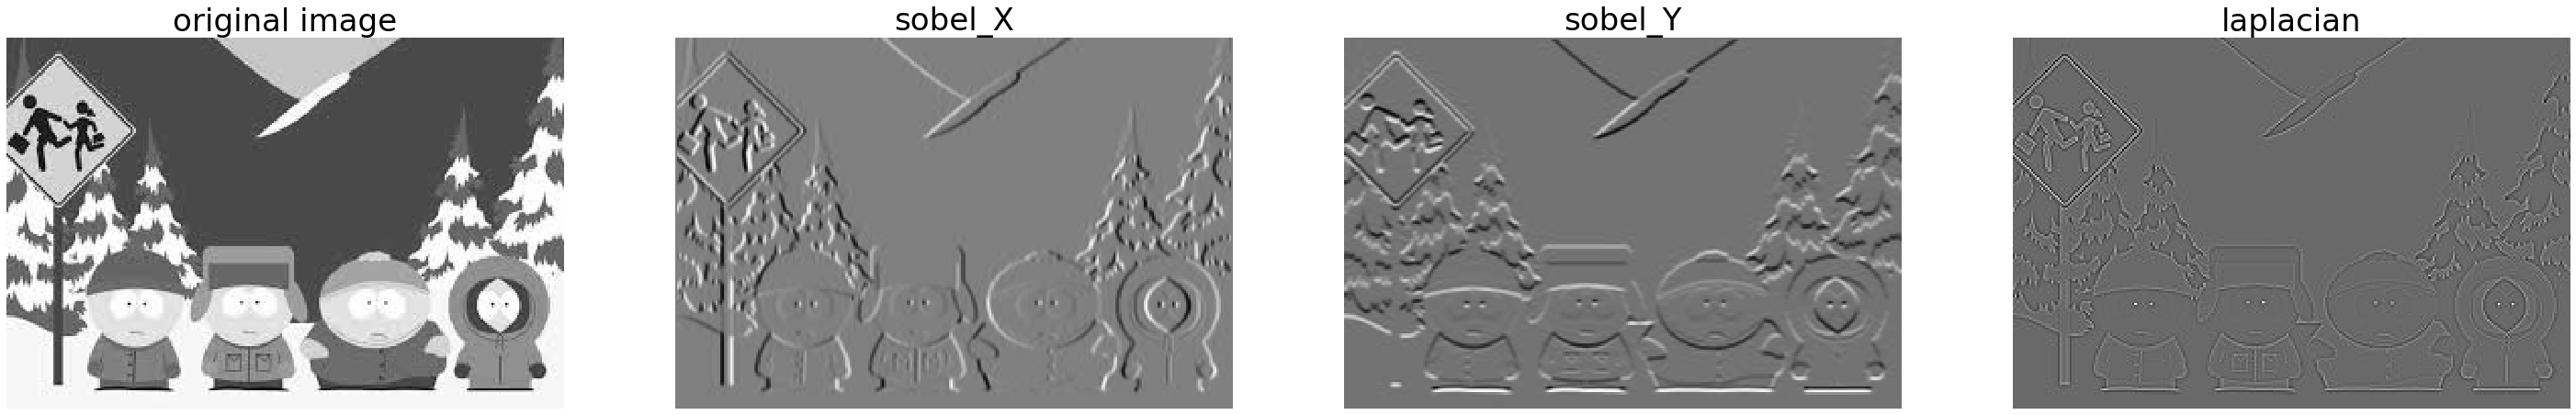

In [81]:
filter_dict = {'sobel_X' : np.array(([-1, 0, 1],
                                    [-2, 0, 2],
                                    [-1, 0, 1]), dtype="int"),
              'sobel_Y' : np.array(([-1, -2, -1],
                                   [0, 0, 0],
                                   [1, 2, 1]), dtype="int"),
               'laplacian' : np.array(([0, 1, 0],
                                       [1, -4, 1],
                                       [0, 1, 0]), dtype="int")
              }
convolve(filter_dict, src)
convolve(filter_dict, src_sp)

### Blurring

In [55]:
def blur(blur_size_list, src_img):
    plt.figure(figsize=(50, 40))
    col_ind = 2
    img = np.float32(src)
    fig = plt
    plt.subplot(1, len(blur_size_list)+1, 1), plt.imshow(img, cmap = 'gray')
    plt.axis('off')
    for size in blur_size_list:
        kernel = np.ones((size,size),np.float32)/ size**2
        output = cv2.filter2D(img, -1, kernel)
        plt.subplot(1, len(blur_size_list)+1, col_ind), plt.axis('off'), plt.imshow(output, cmap = 'gray')
        plt.title('blurring with n_hood= ' + str(size), fontsize = 34)
        col_ind +=1 
    plt.show()

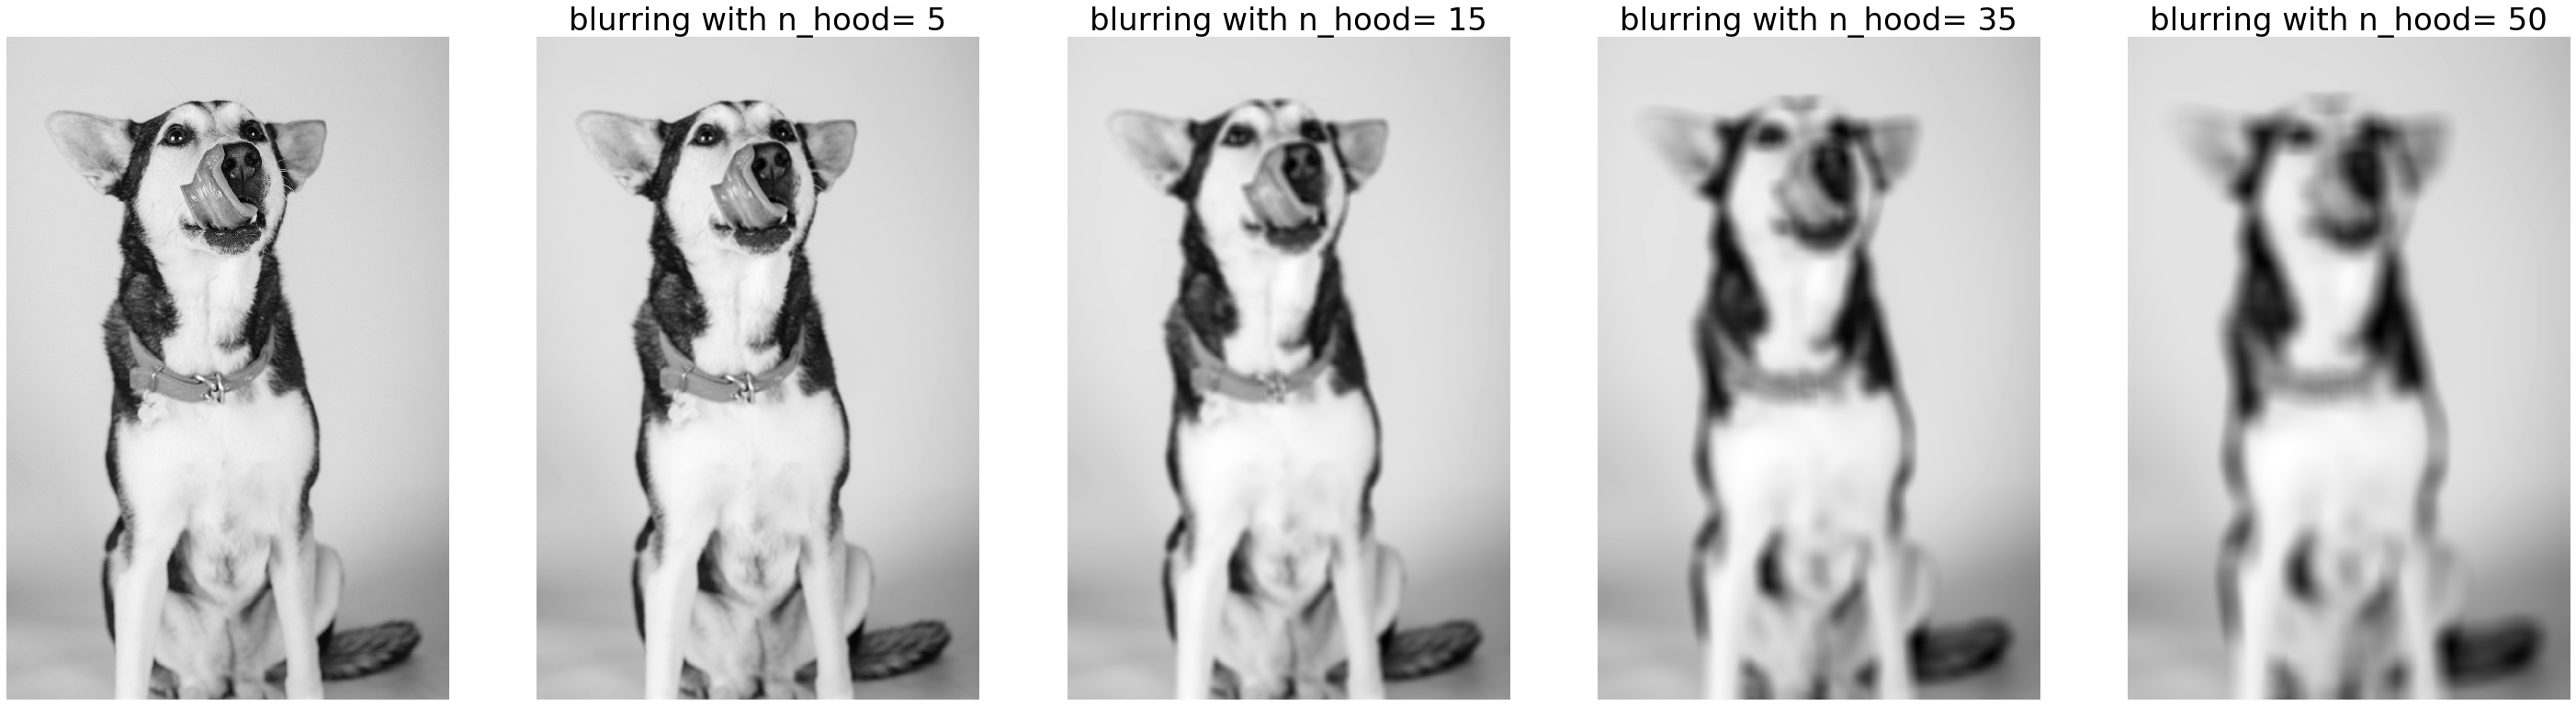

In [56]:
sizes = [5,15,35,50]
blur(sizes, src)

### Example- sharpening an image

Adding the edges we found to an image could make it look sharper.
Let's take for example an image, first blur it, and then sharpen it.

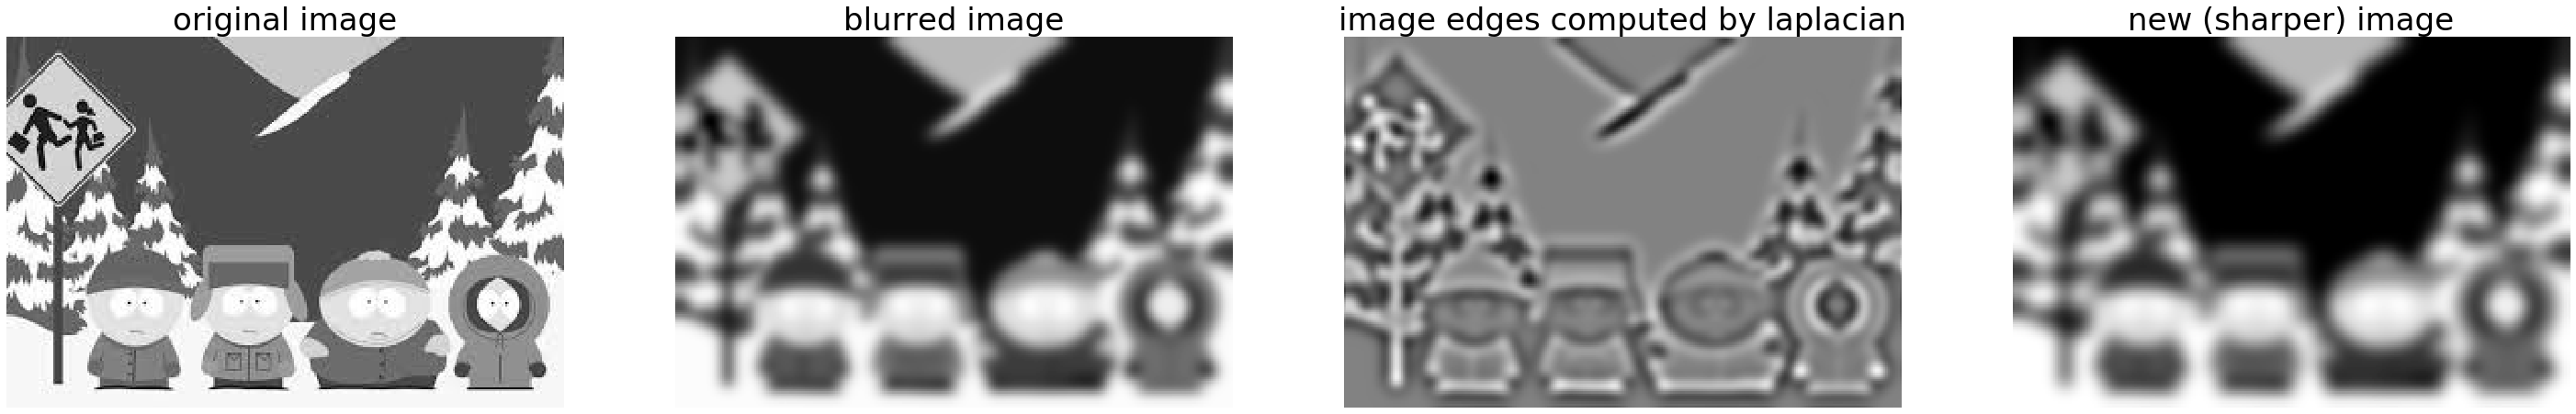

In [133]:
plt.figure(figsize = (50,40))
img = np.float32(src_sp)
plt.subplot(1, 4, 1), plt.imshow(img, cmap = 'gray'),
plt.axis('off'), plt.title('original image',fontsize = 34)

# Prepare a gaussian kernel for blurring:
# First a 1-D  Gaussian
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump) # normalize the integral to 1
# make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]
# Blurring the images
blurred = cv2.filter2D(img, -1, kernel)
plt.subplot(1, 4, 2), plt.imshow(blurred, cmap = 'gray'),
plt.axis('off'), plt.title('blurred image',fontsize = 34)
# Extracting edges of the blurred image
lap_edges = cv2.filter2D(blurred, -1, filter_dict['laplacian'])
plt.subplot(1, 4, 3), plt.imshow(lap_edges, cmap = 'gray'),
plt.axis('off'), plt.title('image edges computed by laplacian' 
                           ,fontsize = 34)
#Adding the edges to the blurred image
new_img = blurred + 2*lap_edges
plt.subplot(1, 4, 4), plt.imshow(new_img, cmap = 'gray'),
plt.axis('off'), plt.title('new (sharper) image' ,fontsize = 34)
plt.show()

### Note that the default of openCV is correlation and not convolution!!

Then what should we do if we want to convolve AND use OpenCV?

## Using scipy.signal.convolve

In [82]:
import scipy.signal as ss

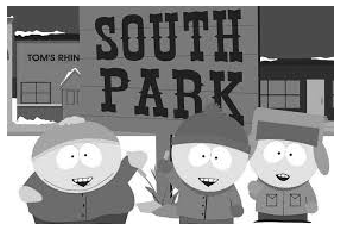

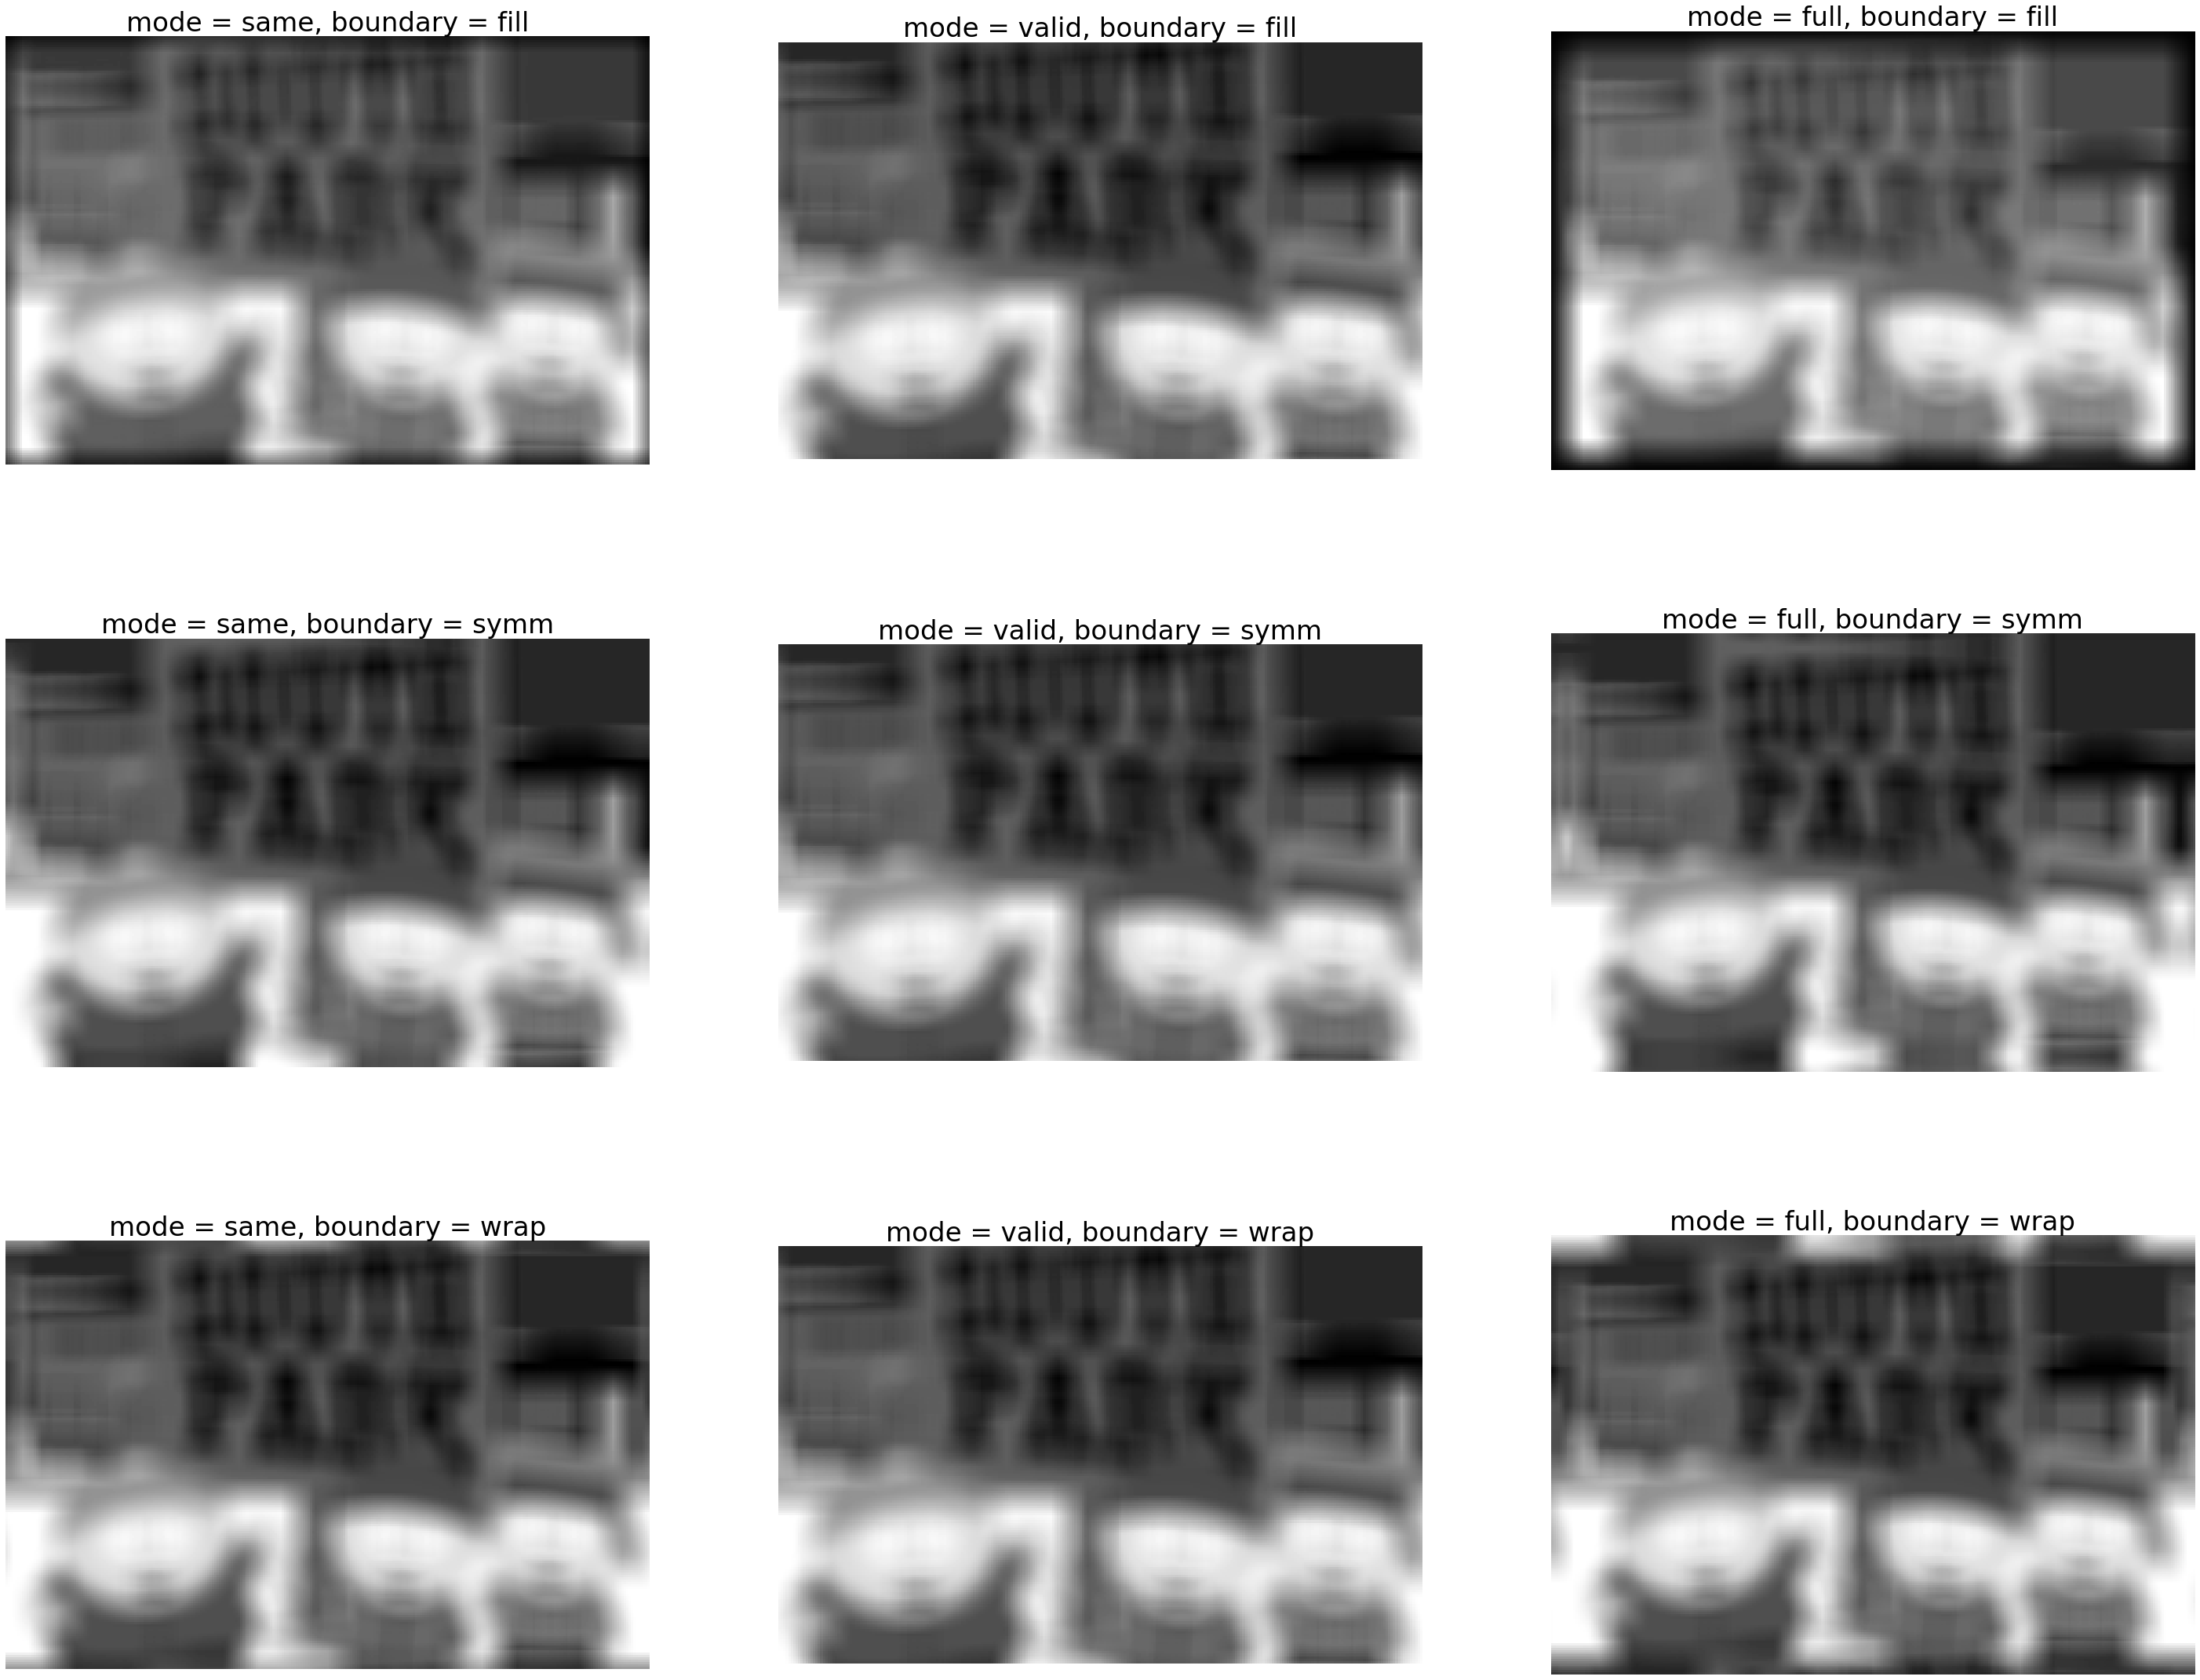

In [114]:
kernel_sobel = filter_dict['sobel_X']
kernel_blur = np.ones((15,15),np.float32)/ 15**2
boundaries = ['fill','symm','wrap']
modes = ['same','valid','full']
plt.imshow(src_sp_bound, cmap = 'gray'), plt.axis('off')
plt.show()
plt.figure(figsize = (50,40))
for row, bound in enumerate(boundaries):
    for col, mode in enumerate(modes):
        output = ss.convolve2d(src_sp_bound, kernel_blur, 
                               boundary=bound, mode=mode)
        plt.subplot(len(boundaries), len(modes),
                    (row) * len(modes) + col+1)
        plt.axis('off'), plt.imshow(output, cmap = 'gray')
        plt.title('mode = {}, boundary = {}'.format(mode, bound),
                  fontsize = 34)
plt.show()

But unlike traditional (highschool) matrices, "image matrices" also have depth. Meaning, the matrix is a multi-dimensional matrix, where the last dimension represent the different color channels

Use scipy.signal.convolve to convolve 3d matrices